# Group 142 Problem statement 6
<hr><br>
This dataset is one that has been artificially created to seem like weather data for the sake of 
classification procedures. It takes into account a wide range of aspects that are associated with 
the weather such as temperature, humidity, precipitation, cloud cover, season etc. and divides 
the weather into the 4 distinct categories. We need to perfrom, data visualization, data pre-processing 
and model training on it.

## <u> Team members </u>

| Name  | Bits Id |
|:------|:---------|
| HRISHIKESH MALAKAR | 2023Ac05058 |
| NAIR ANIT KAVALIBALAN | 2023ac05503 |
| ANUP JINDAL | 2023ac05472 |





### Importing libraries and necessary dataset.
<hr>

In [23]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

weather_data = pd.read_csv('./weather_classification_data.csv')

### Data visualization and exploration
<hr>

In [24]:
### Printing random two rows

## Select two random rows
random_rows = weather_data.sample(n=2)

## Print in good format
print(random_rows.to_string(index=False))

 Temperature  Humidity  Wind Speed  Precipitation (%) Cloud Cover  Atmospheric Pressure  UV Index Season  Visibility (km) Location Weather Type
          35        55         8.0                 12       clear               1023.20         5 Autumn              6.0 mountain        Sunny
           1        78         6.0                 58    overcast                989.11         1 Winter              4.5   inland        Snowy


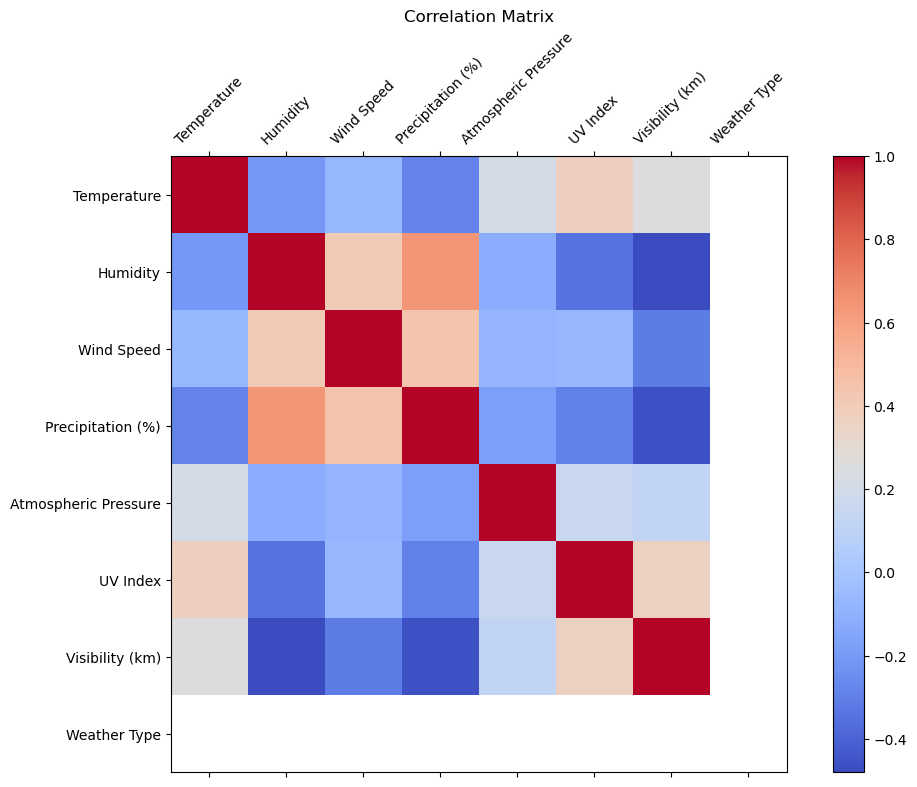

In [25]:
# Encode 'Weather Type' as numeric
# List of features to plot
weather_data_copy = weather_data.copy()
weather_data_copy['Weather Type'] = weather_data_copy['Weather Type'].map({'sunny': 0, 'cloudy': 1, 'rainy': 2})

# Compute correlation matrix
corr_matrix = weather_data_copy[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)','Atmospheric Pressure', 'UV Index', 'Visibility (km)', 'Weather Type']].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()